
             Trial License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 10.1.2

Knitro presolve eliminated 0 variables and 0 constraints.

Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 1.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (78 variables).

Problem Characteristics                    ( Presolved)
-----------------------
Objective goal:  Minimize
Number of variables:                   154 (       154)
    bounded below:                       0 (         0)
    bounded above:                       0 (         0)
    bounded below and above:           154 (       154)
    fixed:                               0 (         0)
    free:                                0 (         0)
Number of constraints:


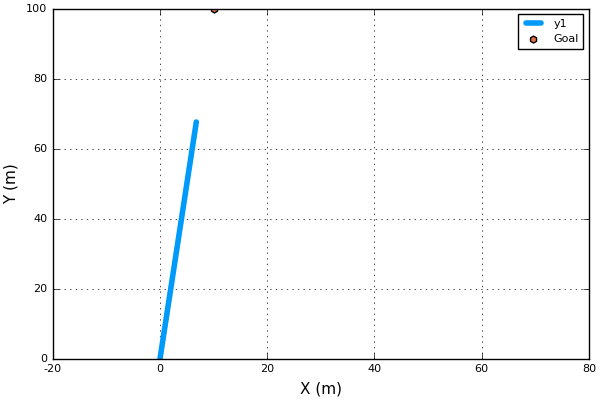

In [13]:
using NLOptControl, JuMP, Parameters, Plots, VehicleModels
pa = VparaKB(x0_=0.);  @unpack_VparaKB pa # vehicle parameters
n = NLOpt();
X0 = [x0_,y0_,psi0_,u0_];
XF = [NaN,NaN,NaN,NaN];
XL = [x_min,y_min,psi_min,u_min];
XU = [x_max,y_max,psi_max,u_max];
CL = [sa_min,ax_min];
CU = [sa_max,ax_max];
n = define(n,stateEquations=KinematicBicycle,numStates=4,numControls=2,X0=X0,XF=XF,XL=XL,XU=XU,CL=CL,CU=CU)
n = configure(n,Ni=2,Nck=[15,10];(:integrationMethod => :ps),(:integrationScheme => :lgrExplicit),(:finalTimeDV => false),(:tf => 4.0))
defineSolver(n,solver=:KNITRO)
mdl = build(n);
names = [:x,:y,:psi,:ux];
descriptions = ["X (m)","Y (m)","Yaw Angle (rad)","Longitudinal Velocity (m/s)"];
stateNames(n,names,descriptions)
names = [:sr,:jx];
descriptions = ["Steering Angle (rad)","Longitudinal Acceleration (m/s^2)"];
controlNames(n,names,descriptions)
params = [pa];   # vehicle parameters
n,r = OCPdef(mdl,n,params);

# define target
x_ref = 10; y_ref = 100;
@NLobjective(mdl, Min, (r.x[end,1]-x_ref)^2 + (r.x[end,2]-y_ref)^2);

# solve model
solve(mdl)

# post processing
postProcess(n,r);
s = 700; w1 = 7; w2 = 4; ms = 5; ms2 = 1;# plotting options
pp=plot(0,leg=:false)
plot!(r.X[:,1],r.X[:,2],line = (w2))
scatter!((x_ref, y_ref), markershape = :hexagon, markersize = ms, label="Goal",leg=true)
xlims!((-20,80));ylims!((0,100));xaxis!("X (m)");yaxis!("Y (m)")


In [14]:
solve(mdl)


             Trial License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 10.1.2

Knitro presolve eliminated 0 variables and 0 constraints.

Knitro changing algorithm from AUTO to 1.
Knitro changing bar_initpt from AUTO to 3.
Knitro changing bar_murule from AUTO to 4.
Knitro changing bar_penaltycons from AUTO to 1.
Knitro changing bar_penaltyrule from AUTO to 2.
Knitro changing bar_switchrule from AUTO to 2.
Knitro changing linsolver from AUTO to 2.
Knitro shifted start point to satisfy presolved bounds (27 variables).

Problem Characteristics                    ( Presolved)
-----------------------
Objective goal:  Minimize
Number of variables:                   154 (       154)
    bounded below:                       0 (         0)
    bounded above:                       0 (         0)
    bounded below and above:           154 (       154)
    fixed:                               0 (         0)
    free:                                0 (         0)
Number of constraints:

:Optimal